<a href="https://colab.research.google.com/github/124shlomis/ML_COURSE/blob/master/homework_2_K_Means_Adir_Shlomi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - K-Means

In this assignment, we will solve the same problem which appeared in workshop 4, but this time using the K-Medians algorithm instead of the K-Means algorithm.

(This assignment does not rely on the content of the workshop for solving it).

## Reminders

- Start by making a copy of this notebook in order to be able to save it.
- Use **Ctrl+[** to expend all cells.
- You can find the documentation for the NumPy functions (the functions starting with *np.*) [here](https://docs.scipy.org/doc/numpy/index.html)
- You can find the documentation for the SciPy functions (the functions imported from scipy) [here](https://docs.scipy.org/doc/scipy/reference/)

## Tip of the day

- You can adjust your preferences such, as adding line numbers to your code cells and changing the default indentation to 4,  in the tools->preferences menu.

## Your IDs

✍️ Fill in your IDs in the cell below:

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
# Replace the IDs bellow with our own
student1_id = ''
student2_id = '012345678'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 305428815 & 012345678


### Importing Packages

Importing the NumPy, Pandas and Matplotlib packages.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

## 🚖 The NYC (New York City) Taxi Dataset 

As part of the effort of NYC to make its data publicly available and accessible, the city releases every month the full list of all taxi rides around the city. We will be using the dataset from January 2016, which can be found [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

The full dataset includes over 10M taxi rides. In our course, we will be using a smaller subset of this dataset with only 100k rides (which has also been cleaned up a bit). The smaller dataset, which we will be using, can be found [here](https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv)

We will start by loading the data and printing the 10 first rows:

In [0]:
data_file = 'https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: N={}'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

Number of rows in the dataset: N=100000


,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


In this exercise we will only be interested in the following columns:

- **dropoff_easting** - The horizontal coordinate (east-west) (in UTM-WGS84 (~ in kilometers))
- **dropoff_northing** - The vertical coordinate (north-south) (in UTM-WGS84 (~ in kilometers))

(A full description for each of the other columns can be found [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf))

<br>

✍️ Define the $2\times N$ array $X$ of drop off locations. To extract more then one column from a DataFrame use the following syntax: 

``` python
array = dataframe[['column1', 'column2']].values
```

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
x_full = dataset[['dropoff_easting', 'dropoff_northing']].values
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The first 10 rows in X are:\n{}'.format(x_full[:10, :]))

The first 10 rows in X are:
[[ 588.15511774 4515.18088924]
 [ 584.85048892 4512.63208213]
 [ 585.43418784 4513.17496388]
 [ 586.67153039 4512.55406531]
 [ 585.26247362 4511.75547748]
 [ 585.16897267 4511.54010337]
 [ 588.71017492 4514.20918449]
 [ 585.84396658 4509.54508925]
 [ 583.67108081 4507.73557339]
 [ 587.7012478  4513.70969066]]


The following code plots the map of drop off points

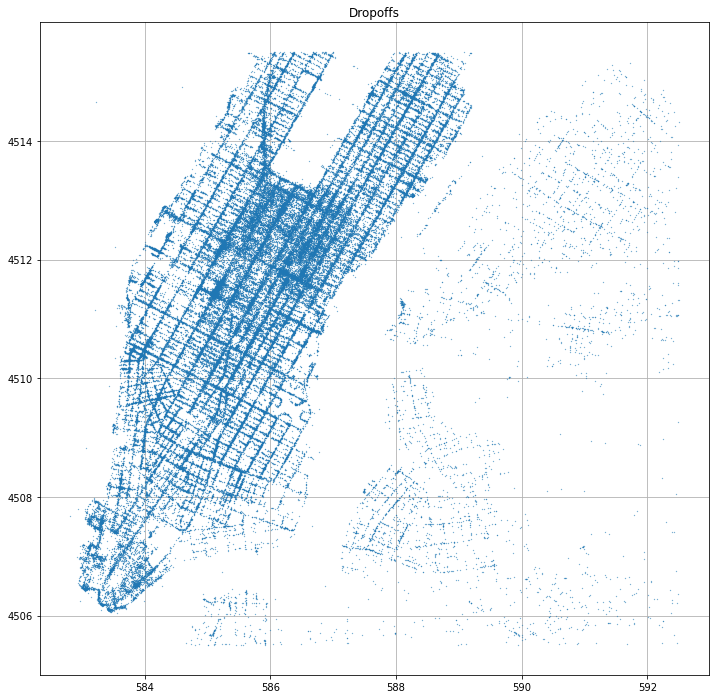

In [0]:
## Plot the map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x_full[:, 0], x_full[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs');

Make sure that that the figure you got resembles the shape of the streets in NYC: [map](https://www.google.com/maps/@40.7328589,-73.9545177,13z)

## 📚 Splitting the Data

✍️ Complete the code below to split the data into 80% train set and 20% test set

#### A comment about NumPy indexing

Given a NumPy array *a* of length $N$ use can use the following command to extract a slice of the array:
- *a[4:8]* - Returns the sub array: $\left[a_4,a_5,a_6,a_7\right]$ (from $a_4$ to $a_8$ (not including))
- *a[:8]* - Returns the sub array: $\left[a_0,a_1,...,a_6,a_7\right]$ (from the beginning of the array up to $a_8$ (not including))
- *a[4:]* - Returns the sub array: $\left[a_4,a_5,...,a_{N-2},a_{N}\right]$ (from $a_4$ to the end of the array)
- *a[[5,2,7]]* - Returns the sub array: $\left[a_5,a_2,a_7\right]$ (the values at selected locations)

In [0]:
n_samples = x_full.shape[0]

## Create a random generator using a fixed seed (we will always prefer to fix the seed so that the results will be reproducible).
rand_gen = np.random.RandomState(0)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Generating a vector of indices
indices = np.arange(0,n_samples) ## Use the function np.arange to create the array of: [0, 1, 2, ..., n_samples-1]
## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
n_samples_test = n_samples - n_samples_train
train_indices = indices[0:n_samples_train] ## Assign the first n_samples_train values of the indices array to train_indices
test_indices = indices[n_samples_train:] ## Assign the last n_samples_test values of the indices array to test_indices

x_train = x_full[train_indices,:] ## Assign the values of x_full to x_train and x_test by using the train_indices and  test_indices
x_test = x_full[test_indices,:]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))

The shape of x_train is: (80000, 2)
The shape of x_test is: (20000, 2)


## ❓️ Problem 1: Finding The Optimal Parking Lots Locations

A NY taxi company is looking to rent $K$ parking lots so that their taxis can wait in them in between rides.

It would like to select the optimal locations to place these parking lots such that the average distance from the drop off location to the nearest parking lot will be minimal.

## The $L1$ (Manhattan) Distance.

In the workshop we have searched for the best $K$ locations which will minimize the $L2$ (Euclidean) distances, but actually, in the case of NYC, it makes more sense to minimize the $L1$ distance. 

Reminder: for two $d$ dimensional vectors $\boldsymbol{x}=[x_1, x_2, ..., x_d ]^T$ and $\boldsymbol{y}=[y_1, y_2, ..., y_d ]^T$ , the $L2$ (Euclidean) distance between the two vectors is define as:

$$
\left\lVert x-y\right\rVert_2=\sqrt{\sum_i\left(x_i-y_i\right)^2}
$$

the $L1$ (Manhattan) distance between the vectors is defined as:

$$
\left\lVert x-y\right\rVert_1=\sum_i\left|x_i-y_i\right|
$$


While the $L2$ distance corresponds to the length of the straight line between the 2 points (the length of the green line in the figure below) the $L1$ distance corresponds to taking a path which only moves in parallel to the axis (the length of yellow, blue and red lines, which all have the same length). Since the streets of Manhattan are designed as a square grid the actual driving distance between two points in the city is the $L1$ distance between them.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/500px-Manhattan_distance.svg.png" width="300px" style="width:300px"/></center>

([image was taken from Wikipedia](https://en.wikipedia.org/wiki/Taxicab_geometry))



✍️  Write two functions which calculate the $L1$ and $L2$ distance between two vectors. 

Assume that the inputs *x* and *y* are 1D arrays and use *np.abs*, *np.sqrt*, *np.sum* and the basic operators *x-y* and  *x**2* to calculate the norms

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
def calc_l1_dist(x, y):
    norm = np.sum(np.abs(x - y))
    return norm

def calc_l2_dist(x, y):
    norm = np.sqrt(np.sum(x ** 2 + y ** 2))
    return norm
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Testing the functions
v1 = np.array([0, 0])
v2 = np.array([3, 0])
v3 = np.array([0, 4])
v4 = np.array([3, 4])
  
print('v1 = {}'.format(v1))
print('v2 = {}'.format(v2))
print('v3 = {}'.format(v3))
print('v4 = {}'.format(v4))

print('L1 norm beteen v1 and v2: {:.2f}'.format(calc_l1_dist(v1, v2)))
print('L2 norm beteen v1 and v2: {:.2f}'.format(calc_l2_dist(v1, v2)))
print('')
print('L1 norm beteen v2 and v3: {:.2f}'.format(calc_l1_dist(v2, v3)))
print('L2 norm beteen v2 and v3: {:.2f}'.format(calc_l2_dist(v2, v3)))
print('')
print('L1 norm beteen v1 and v4: {:.2f}'.format(calc_l1_dist(v1, v4)))
print('L2 norm beteen v1 and v4: {:.2f}'.format(calc_l2_dist(v1, v4)))

v1 = [0 0]
v2 = [3 0]
v3 = [0 4]
v4 = [3 4]
L1 norm beteen v1 and v2: 3.00
L2 norm beteen v1 and v2: 3.00

L1 norm beteen v2 and v3: 7.00
L2 norm beteen v2 and v3: 5.00

L1 norm beteen v1 and v4: 7.00
L2 norm beteen v1 and v4: 5.00


## The cdist functions

A much more efficient way to calculate all the distances between two lists of vectors would be to use the [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function from the scipy package. The third parameter of this function define the type of distance which is to be used: *euclidean* for $L2$ and *cityblock* for $L1$.

✍️ Complete the following code which calculates all the $L1$ and $L2$ distances between all of the above $v$ vectors 

In [0]:
## Put all the vectors in to one 2D array
v = np.stack((v1, v2, v3, v4), axis=0)

from scipy.spatial.distance import cdist
all_l2_distances = cdist(v, v, 'euclidean')
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
all_l1_distances = cdist(v, v, 'cityblock')
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The L1 distances between the v vectors is given by:\n{}'.format(all_l1_distances))
print('')
print('The L2 distances between the v vectors is given by:\n{}'.format(all_l2_distances))

The L1 distances between the v vectors is given by:
[[0. 3. 4. 7.]
 [3. 0. 7. 4.]
 [4. 7. 0. 3.]
 [7. 4. 3. 0.]]

The L2 distances between the v vectors is given by:
[[0. 3. 4. 5.]
 [3. 0. 5. 4.]
 [4. 5. 0. 3.]
 [5. 4. 3. 0.]]


## Rotating the map

In order for the L1 distance to actually be the ride distance, we need to rotate the map such that the streets of NYC will be parallel to the axis.

✍️ Rotate the array of drop off points $x$ such that:
- The streets of NYC (going from South-East to North-West) will be parallel to the x axis
- The Avenues of NYC (going from South-west to North-East) will be parallel to the y axis.

Do so by constructing a rotation matrix, and multiply $x$ by that matrix to get the rotated drop off points.

Use the following:

- A normalized vector pointing in a direction parallel to the avenues of NYC: 

$$
\boldsymbol{e}_1=\left(0.88, -0.47\right)^T
$$

- A normalized vector pointing in a direction parallel to the streets of NYC: 
$$
\boldsymbol{e}_2=\left(0.47, 0.88\right)^T
$$

- To define a following 2 by 2 array (matrix)
$$
\begin{bmatrix}
    10 & 20 \\
    30 & 40 \\
\end{bmatrix}
$$
in Numpy use the following syntax:
```python
np.array(((10, 20), (30, 40)))
```

Use *A @ B* to do matrix multiplications between 2 numpy arrays.

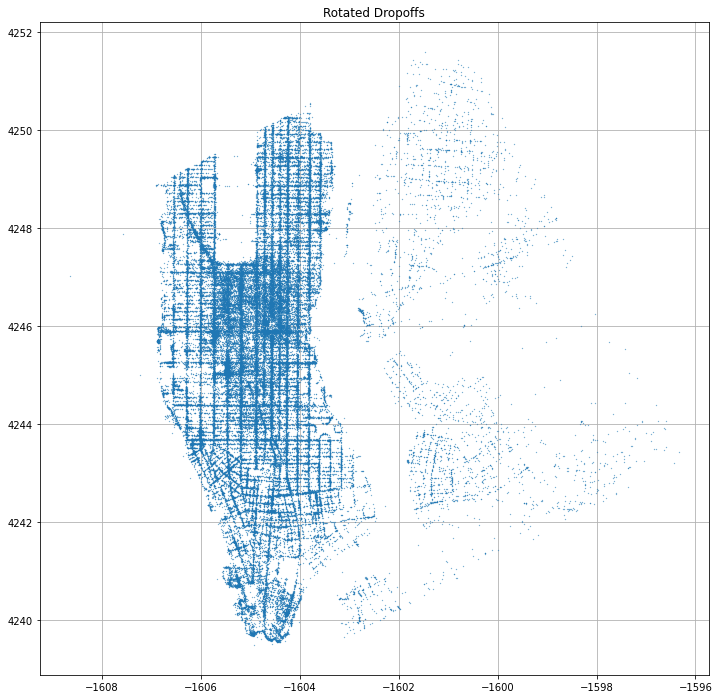

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
rot_mat = np.array(((0.88, 0.47), (-0.47, 0.88)))  ## create the rotation matrix.
x_rot_train = x_train @ rot_mat  ## calculate the rotated version of x_train.
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%

## Plot the map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x_rot_train[:, 0], x_rot_train[:, 1], '.', markersize=0.5);
ax.set_title('Rotated Dropoffs');

Make sure that that the streets are now more or less aligned to x and y axis

## The K-Medians algorithm

Similar to the K-Means algorithm, which tries to minimize the sum of squared $L2$ distances between each point and one of the $K$ centers, there is also a K-Medians algorithm which tries to minimize the sum of $L1$ distances.

As we saw for the case of the $L2$, the center point which minimizes the sum of squared $L2$ distances from a given set of points, is the **mean** point of the given points.

Equivalently, the center point which minimizes the sum of $L1$ distances from a given set of points is the point which is **median** (in each one of the axis) of the given points.

### Reminder

The median (חציון) of an odd set of numbers is the number which has the same amount of numbers larger than him as the amount of numbers smaller than him. For example, the median of $\left(11, 15, 20, 26, 29\right)$  is $20$.

For the case of an even set of points, the median is usually defined as the mean of the two center points or example, the median of $\left(11, 15, 20, 26\right)$  is $\left(15+20\right)/2=17.5$.


### ✍️ Question 2.1
Answer the following question on paper and add them to the theoretical part (החלק היבש) of the assignment.

For the given set of points: $\left(1, 2, 3,4, 5\right)$ write the sum of $L1$ distances between this set of points and any given $x$. Show that the median is, in fact, the point which has the minimal sum of $L1$ distances to this set of points.


### The Algorithm

The K-Means algorithm differs from the K-Medians algorithm in the following way:

1. The assignment of each point the nearest center will now be based upon the $L1$ distance instead of the $L2$ distance.
2. The center will be now calculated using the Median value insted of Mean value.

✍️ Complete the following code so that it will implement the K-Medians algorithm:

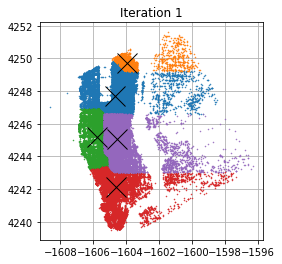

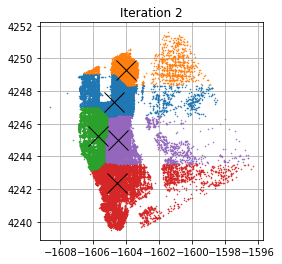

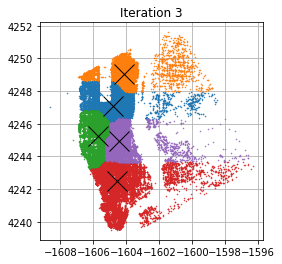

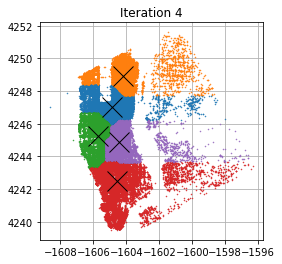

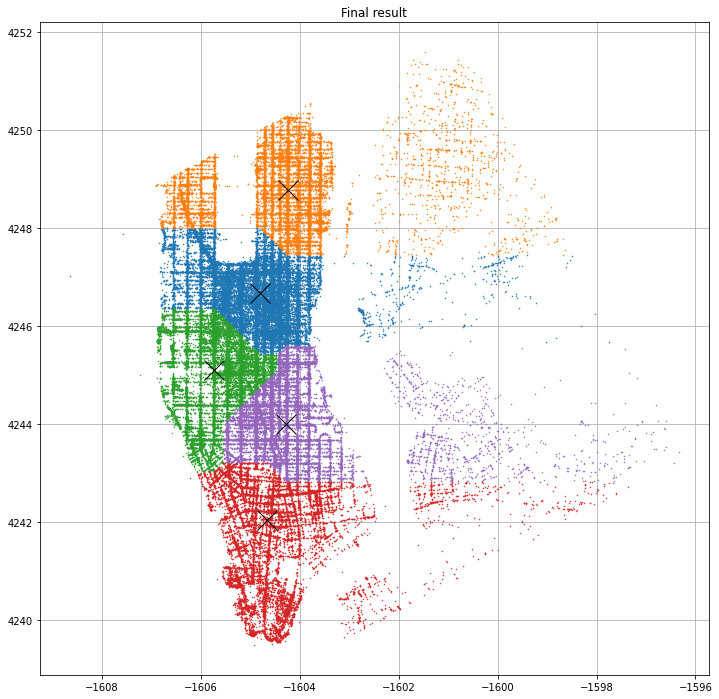

In [0]:
def plot_clusters(x, assignment, parking_lots_locations, title, small=False):
    if small:
        fig, ax = plt.subplots(figsize=(4, 4))
    else:
        fig, ax = plt.subplots(figsize=(12, 12))
    for i_cluster in range(len(parking_lots_locations)):
        cluster_indices = assignment == i_cluster
        ax.plot(x[cluster_indices, 0], x[cluster_indices, 1], '.', markersize=1)
    ax.plot(parking_lots_locations[:, 0], parking_lots_locations[:, 1], 'xk', markersize=20)[0]
    ax.grid(True);
    ax.set_title(title)

def calc_k_medians(x, k, num_of_iteretions_to_plot=0):
  
    n_samples = len(x)

    ## Create a random generator using a fixed seed.
    rand_gen = np.random.RandomState(0)

    ## Initialize the centers using k random points from the dataset.
    centers = x[rand_gen.randint(low=0, high=n_samples, size=k)]

    ## Initialize the assignment vector which defines to which cluster each point belongs.
    ## Under this initilization all point belong to to cluster 0.
    assignment = np.zeros(n_samples, dtype=int)

    i_step = 0
    stop_iterations = False
    while not stop_iterations:
        i_step += 1
        assignment_old = assignment

        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        ## Step 1: Assign points to medians
        distances = cdist(x, centers, 'cityblock')  ## Calculate the distances matrix of all the distances between all the x's and all the centers. Make sure you use the L1 distance
        assignment = np.argmin(distances, axis=1)

        ## Stop criteria
        if (assignment == assignment_old).all():
            stop_iterations = True

        ## Step 2: Update medians
        for i_cluster in range(k):
            cluster_indices = assignment == i_cluster
            x_in_cluster = x[cluster_indices,:]  ## Create a sub set of x which include only the point which belong to the i-th cluster.
            centers[i_cluster] = np.median(x_in_cluster, axis=0)  ## use the axis argument to tell the median function over which axis to operate. It is used in a similar manner as the axis argument of the np.argmin above.
      ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%

        ## Plot the first num_of_iteretions_to_plot
        if i_step < num_of_iteretions_to_plot:
            plot_clusters(x, assignment, centers, 'Iteration {}'.format(i_step), small=True)

    parking_lots_locations = centers
  
    return parking_lots_locations, assignment

## Define K
k = 5

## Run the algorithm
parking_lots_locations, assignment = calc_k_medians(x_rot_train, k, num_of_iteretions_to_plot=5) 
  
plot_clusters(x_rot_train, assignment, parking_lots_locations, 'Final result')

## The average ride distance

✍️ Complete the code below to calculate the average ride distance to a parking lot using the test set

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
def calc_average_distance(parking_locations, x):
    all_distances = cdist(parking_locations, x, 'cityblock')
    distance_to_closest = all_distances.min(axis=0)
    average_distance = np.mean(distance_to_closest)
    return average_distance

x_rot_test = x_test @ rot_mat ## calculate the rotated version of x_test.
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%

average_distance = calc_average_distance(parking_lots_locations, x_rot_test)
print("The average ride distance to a praking lot is {:.2f} Km".format(average_distance) )

The average ride distance to a praking lot is 1.26 Km


## ❓️ Problem 2: Finding The Optimal Number of Parking Lots

Now let us address the topic of selecting the number of parking lots (the number of clusters)

Basically, to reduce the average ride distance we would like as much parking lots as possible, but in practice operating a parking lots cost money. Let us assume that:

1. The price of operating a parking lot is 10k\\$ per month.

2. There will be exactly 100k rides to the parking lots per month.

3. The estimated price per kilometer for when driving to the parking is estimated at 3$ / kilometer.

Basically, we would now like to minimize the following risk function, which is the monthly cost (in k$) of operating the parking lots plus the cost of driving to them:

$$
\hat{R}\left(\left\{\boldsymbol{c}_i\right\}, K\right)= 10\cdot K+3 \cdot 100\cdot\frac{1}{N}\sum_{i=1}^K\sum_{\boldsymbol{x}_j\in S_i}\left\lVert\boldsymbol{x}_j-\boldsymbol{c}_i\right\rVert_1
$$

Where:

- $K$ is the number of parking lots.
- $\left\{\boldsymbol{c}_i\right\}$ is the locations of the $K$ parking lots.
- $N$ is the number of rides in the dataset.
- $\left\{\boldsymbol{x}_i\right\}$ is the set of dropping points in the data set.
- $S_i$ is the set of dropping points which are assigned to the $i$-th parking lot.

✍️ Complete the following code to calculate for calculating the risk function:

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
def calc_risk(parking_lots_locations, x, cost_per_parking, cost_per_avarage_distance):
    k = parking_lots_locations.shape[0]
    average_distance = calc_average_distance(parking_lots_locations, x) ## use the calc_average_distance function
    risk = cost_per_parking*k+cost_per_avarage_distance*average_distance ## Calculate the risk
    return risk
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

cost_per_parking = 10
cost_per_avarage_distance = 300

risk = calc_risk(parking_lots_locations, x_rot_test, cost_per_parking, cost_per_avarage_distance)

print('For {} parking lots, the monthly cost would be: {:.2f}k $'.format(k, risk))

For 5 parking lots, the monthly cost would be: 426.75k $


## Brute force optimization

We will find the optimal $K$ simply be checking all the relevant values of $K$. For this case, we will check all $K$'s between 1 and 30.

We will use a 3-fold split (60% train, 20% validation, 20% test) for selecting the optimal $K$. 


✍️ Complete the following code to split the data and calculate the risks for $K=1,2,3,...,30$. Make sure you use the train, validation and test set in the appropriate places.

The optimal K is 13, with a monthly cost of 360.14k $


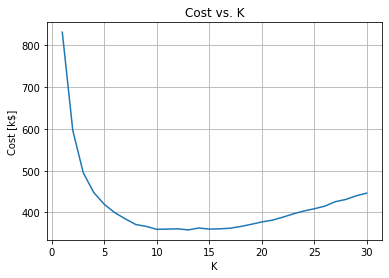

In [0]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(0.6*n_samples)
n_samples_validataion = int(0.2*n_samples)
n_samples_test = n_samples - n_samples_train - n_samples_validataion

train_indices = indices[:n_samples_train]
validataion_indices = indices[n_samples_train:(n_samples_train + n_samples_validataion)]
test_indices = indices[(n_samples_train + n_samples_validataion):]

x_train = x_full[train_indices,:]
x_validataion = x_full[validataion_indices,:]
x_test = x_full[test_indices,:]

x_rot_train = x_train @ rot_mat
x_rot_validataion = x_validataion @ rot_mat
x_rot_test = x_test @ rot_mat

## Create the array of relevant K's
k_array = np.arange(1,31) ## Use np.arange to create the array [1,2,3,...,30] (just for debug print k_array just to be sure you did not include 0 and did included 30)
## Initialize the risks_array
risks_array = np.zeros(k_array.shape)

for i_k, k in enumerate(k_array):  ## enumerate makes the loop run over the pairs of the counter index of 0,1,...,29 and values of the k_array.
    parking_lots_locations, assignment = calc_k_medians(x_rot_train,k) # Use the calc_k_medians function here. Do not plot the iteretions of the algorithm
    risks_array[i_k] = calc_risk(parking_lots_locations, x_rot_validataion, cost_per_parking, cost_per_avarage_distance) ## use the calc_risk function here.

## Plot the risk vs. K
fig, ax = plt.subplots()
ax.plot(k_array, risks_array)
ax.set_title('Cost vs. K')
ax.set_ylabel('Cost [k$]')
ax.set_xlabel('K')
ax.grid(True);

## Find the optimal K
optimal_index = np.argmin(risks_array)
optimal_k = k_array[optimal_index]
optimal_parking_lots_locations, assignment = calc_k_medians(x_rot_train, optimal_k)
optimal_risk = calc_risk(optimal_parking_lots_locations,x_rot_test,cost_per_parking,cost_per_avarage_distance) 
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The optimal K is {}, with a monthly cost of {:.2f}k $'.format(optimal_k, optimal_risk))

## Reminder: Submission

To submit your code download it as a **ipynb** file from Colab, and upload it to the course's website. You can download this code by selecting **Download .ipynb** from the **file** menu.